In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [ ]:
#representing data as pandas dataframe
df = pd.DataFrame(X)
df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64


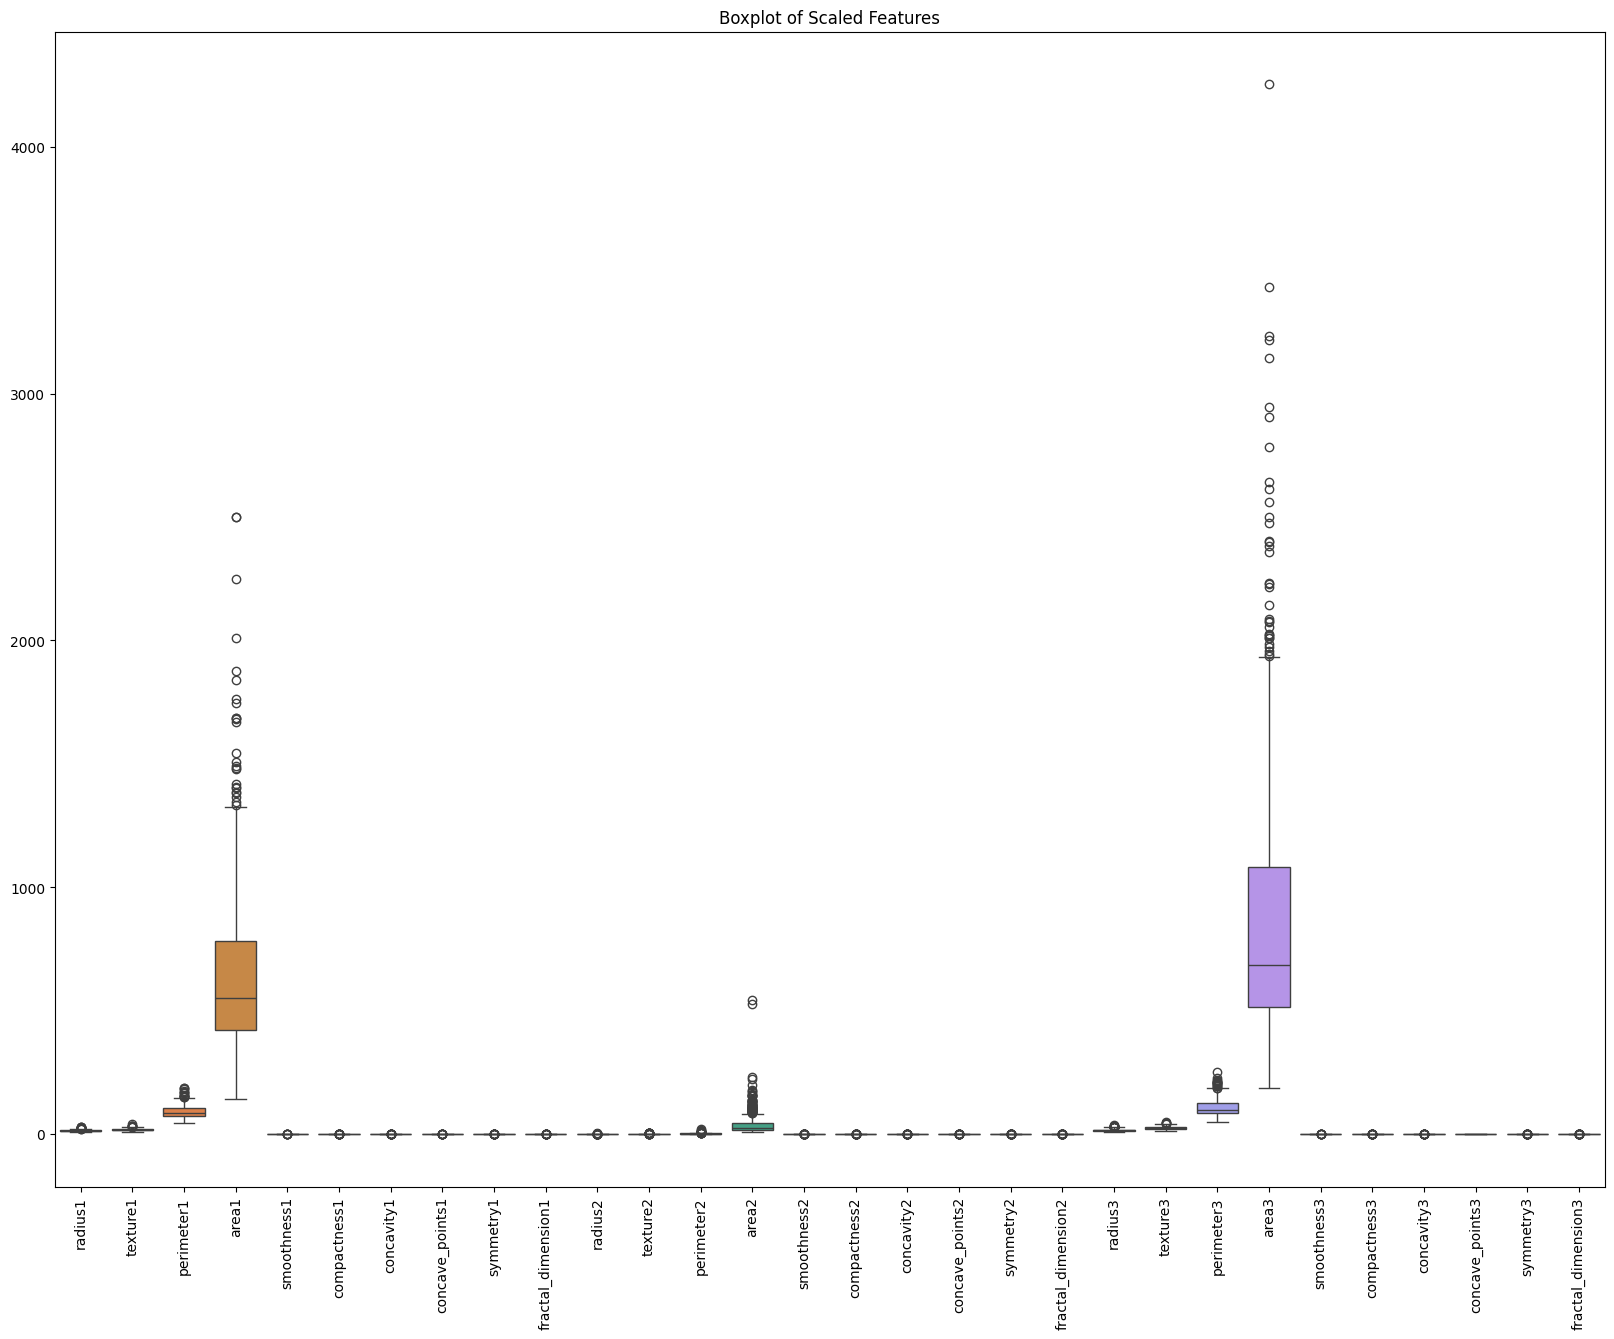


Number of outliers per column (IQR method):
radius1               14
texture1               7
perimeter1            13
area1                 25
smoothness1            6
compactness1          16
concavity1            18
concave_points1       10
symmetry1             15
fractal_dimension1    15
radius2               38
texture2              20
perimeter2            38
area2                 65
smoothness2           30
compactness2          28
concavity2            22
concave_points2       19
symmetry2             27
fractal_dimension2    28
radius3               17
texture3               5
perimeter3            15
area3                 35
smoothness3            7
compactness3          16
concavity3            12
symmetry3             23
fractal_dimension3    24
dtype: int64


In [ ]:

#performing eda
missing_values = df.isna().sum()
print(missing_values)

#dealing with missing values
# Fill numerical columns with mean
df.fillna(df.mean(), inplace=True)


# Check for outliers visually using boxplots
plt.figure(figsize=(20, 15))
sns.boxplot(data=df)
plt.title('Boxplot of Scaled Features')
plt.xticks(rotation=90)
plt.show()

# Check for outliers programmatically using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((df < lower_bound) | (df > upper_bound)).sum()
print("\nNumber of outliers per column (IQR method):")
print(outliers[outliers > 0])


In [ ]:
#standardising the data for use
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [ ]:
#using a label encoder for y
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_enc = le.fit_transform(y)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_enc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [ ]:
#splitting data into training testing set, 80-20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y_enc, test_size=0.2, random_state=42)


# **Decision Tree**

In [ ]:
#finding best parameters using gridsearchCV for decision tree and running
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring="accuracy",n_jobs=-1)
grid_search.fit(X_train, y_train)

#best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


Accuracy: 0.9649122807017544
Precision: 1.0
Recall: 0.9069767441860465
F1-score: 0.9512195121951219


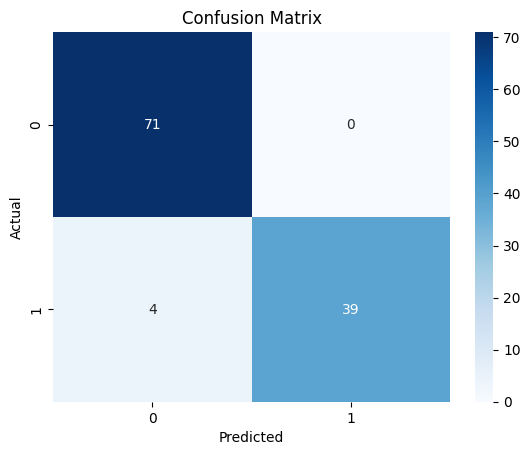

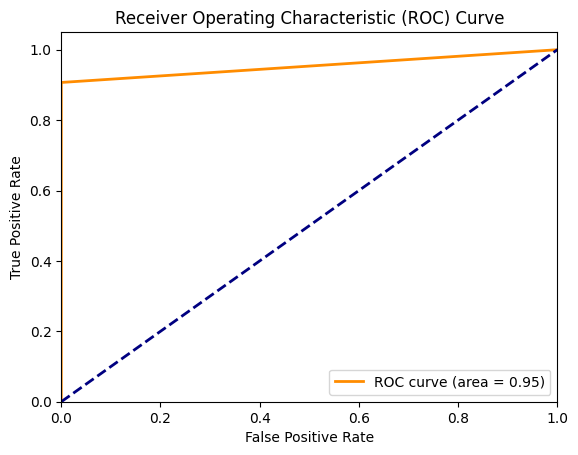

In [ ]:
#applying dt_classifier with these parameters
dt_classifier = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=3, min_samples_leaf=1, min_samples_split=2)
dt_classifier.fit(X_train, y_train)
dty_pred = dt_classifier.predict(X_test)

accuracy_dt = accuracy_score(y_test, dty_pred)
precision_dt = precision_score(y_test, dty_pred)
recall_dt = recall_score(y_test, dty_pred)
f1_dt = f1_score(y_test, dty_pred)

print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)

#displaying confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, dty_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#displaying roc curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, dty_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#k-fold cross validation with the dt classifier
from sklearn.model_selection import cross_val_score
dt_classifier = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=3, min_samples_leaf=1, min_samples_split=2)
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5, scoring="accuracy",n_jobs=-1)
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.97802198 0.91208791 0.94505495 0.94505495 0.93406593]


# **Adaboosting**

In [ ]:
#opengridcv to find best parameters for adaboost
from sklearn.ensemble import AdaBoostClassifier

# Define the parameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1.0]
}

adaboostc = AdaBoostClassifier(random_state=42)
grid_searchab = GridSearchCV(adaboostc, param_grid, cv=5, scoring="accuracy",n_jobs=-1)
grid_searchab.fit(X_train, y_train)

#displaying best parameters
best_params = grid_searchab.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'learning_rate': 1.0, 'n_estimators': 50}


Accuracy: 0.956140350877193
Precision: 0.9523809523809523
Recall: 0.9302325581395349
F1-score: 0.9411764705882353


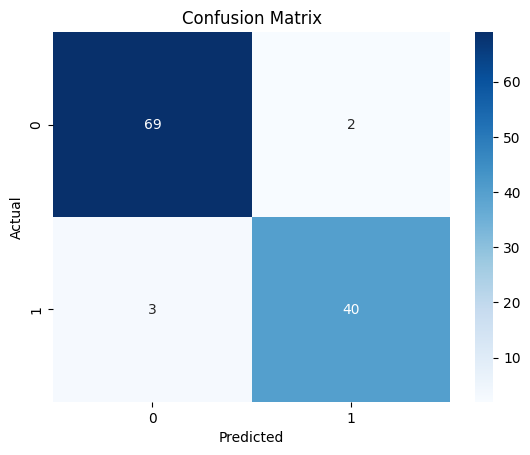

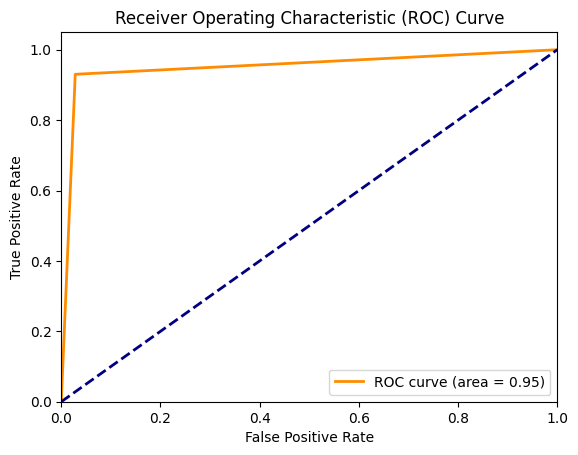

In [ ]:
#performing adaboost with best parameters
adaboostclass = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
adaboostclass.fit(X_train, y_train)
aby_pred = adaboostclass.predict(X_test)

accuracy_ab = accuracy_score(y_test, aby_pred)
precision_ab = precision_score(y_test, aby_pred)
recall_ab = recall_score(y_test, aby_pred)
f1_ab = f1_score(y_test, aby_pred)

print("Accuracy:", accuracy_ab)
print("Precision:", precision_ab)
print("Recall:", recall_ab)
print("F1-score:", f1_ab)

#displaying confusion matrix
cm = confusion_matrix(y_test, aby_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#displaying roc curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, aby_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#k-fold cross validation with adaboost
from sklearn.model_selection import cross_val_score
adaboostclass = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
cv_scores= cross_val_score(adaboostclass, X_train, y_train, cv=5, scoring="accuracy",n_jobs=-1)
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.95604396 0.95604396 0.97802198 0.97802198 0.95604396]


# **Gradient Boosting**

In [ ]:
#finding best parameters for Gradient boosting using GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

#defining param grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1.0],
    "max_depth": [3, 5, 10],
    "subsample": [0.8, 0.9, 1.0]
}

gradboost = GradientBoostingClassifier(random_state=42)
grid_searchgb = GridSearchCV(gradboost, param_grid, cv=5, scoring="accuracy",n_jobs=-1)
grid_searchgb.fit(X_train, y_train)

#displaying best parameters
best_paramsgb = grid_searchgb.best_params_
print("Best Parameters:", best_paramsgb)



Best Parameters: {'learning_rate': 1.0, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.9}


Accuracy: 0.9473684210526315
Precision: 0.9302325581395349
Recall: 0.9302325581395349
F1-score: 0.9302325581395349


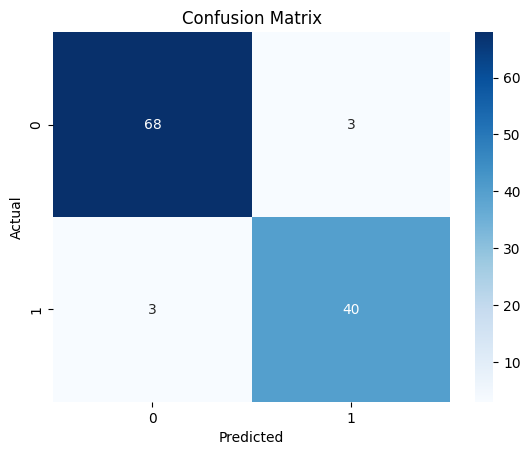

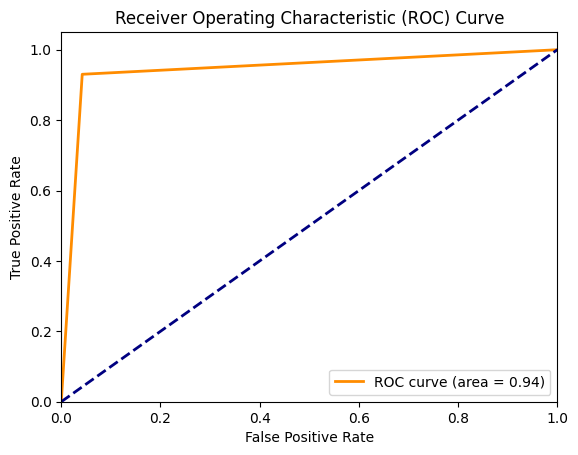

In [ ]:
#performing gradient boost with best parameters
gradboost = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=3, subsample=0.9, random_state=42)
gradboost.fit(X_train, y_train)
gby_pred = gradboost.predict(X_test)

accuracy_gb = accuracy_score(y_test, gby_pred)
precision_gb = precision_score(y_test, gby_pred)
recall_gb = recall_score(y_test, gby_pred)
f1_gb = f1_score(y_test, gby_pred)

print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1-score:", f1_gb)

#displaying confusion matrix
cm = confusion_matrix(y_test, gby_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#displaying roc curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, gby_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



In [ ]:
#k-fold cross validation
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
gradboost = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=3, subsample=0.9, random_state=42)
cv_scores = cross_val_score(gradboost, X_train, y_train, cv=5, scoring="accuracy",n_jobs=-1)
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.98901099 0.95604396 0.97802198 0.96703297 0.94505495]


# **XGBoost**

In [ ]:
#finding best parameters for XGBoost using OpenGridCV
from xgboost import XGBClassifier

param_grid = {
              "n_estimators": [50, 100, 200],
              "learning_rate": [0.01, 0.1, 1.0],
              "max_depth": [3, 5, 10],
              "subsample": [0.8, 0.9, 1.0],
              "gamma": [0, 0.1, 1.0],
              "colsample_bytree": [0.8, 0.9, 1.0]
}

xgb_classifier = XGBClassifier(random_state=42)
grid_searchxgb = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring="accuracy",n_jobs=-1)
grid_searchxgb.fit(X_train, y_train)

best_paramsxgb=grid_searchxgb.best_params_
print("Best Parameters:", best_paramsxgb)


Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}


Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall: 0.9302325581395349
F1-score: 0.9523809523809523


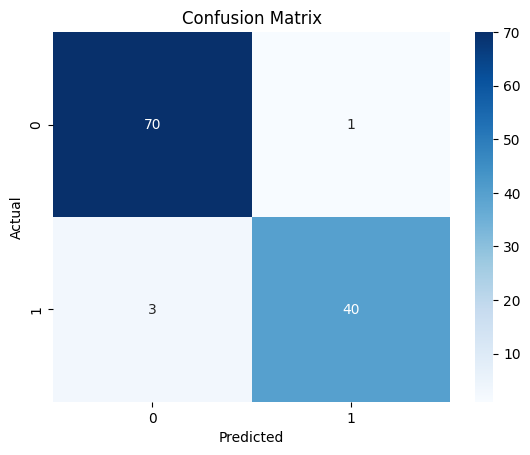

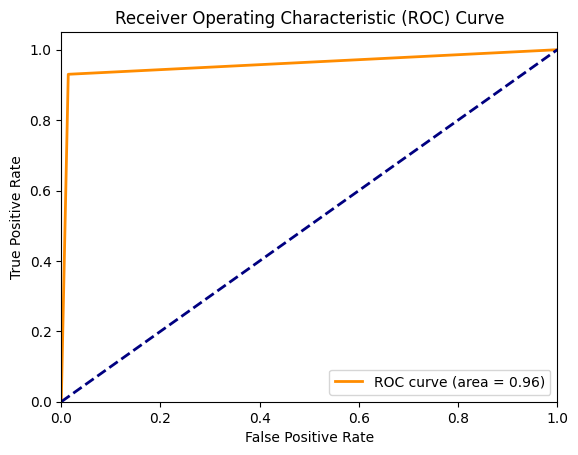

In [ ]:
#performing xgboost with best parameters

xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, subsample=0.9, gamma=0, colsample_bytree=0.8)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, xgb_pred)
precision_xgb = precision_score(y_test, xgb_pred)
recall_xgb = recall_score(y_test, xgb_pred)
f1_xgb = f1_score(y_test, xgb_pred)

print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1-score:", f1_xgb)

#displaying confusion matrix
cm = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#displaying roc curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, xgb_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
#k-fold cross validation for xgboost
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, subsample=0.9, gamma=0, colsample_bytree=0.8)
cv_scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring="accuracy",n_jobs=-1)
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.96703297 0.96703297 0.98901099 0.97802198 0.94505495]


# **Random Forest Classifier**

In [ ]:
#finding best parameters for Random Forest model using opengrid cv
from sklearn.ensemble import RandomForestClassifier

param_listf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "criterion":["gini", "entropy"],
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [2, 5, 10]
}

rf_classifier = RandomForestClassifier(random_state=42)
open_grid_search = GridSearchCV(rf_classifier, param_listf, cv=5, scoring="accuracy",n_jobs=-1)
open_grid_search.fit(X_train, y_train)

best_paramsrf = open_grid_search.best_params_
print("Best Parameters:", best_paramsrf)



Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 50}


Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1-score: 0.9647058823529412


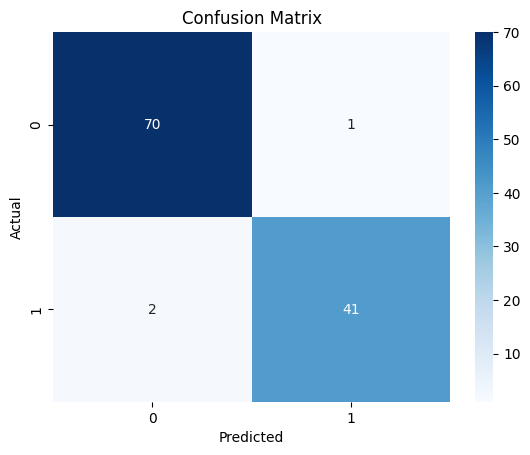

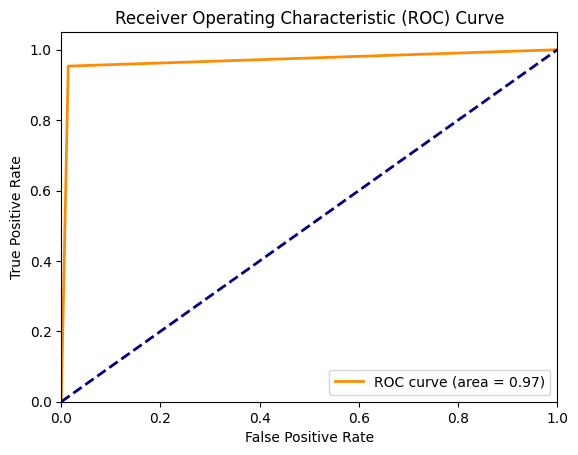

In [ ]:
#Using Random Forest Model using best parameters
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=None, criterion="gini", max_features="log2", min_samples_split=5, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, rf_pred)
precision_rf = precision_score(y_test, rf_pred)
recall_rf = recall_score(y_test, rf_pred)
f1_rf = f1_score(y_test, rf_pred)

print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)

#displaying confusion matrix
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#displaying roc curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, rf_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()




In [ ]:
#kfold cross validation with RFC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=None, criterion="gini", max_features="log2", min_samples_split=5, random_state=42)
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring="accuracy",n_jobs=-1)
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.97802198 0.95604396 0.97802198 0.95604396 0.96703297]


# **STACKING CLASSIFIERS**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# --- SVM ---
svm = SVC(probability=True)
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
grid_svm = GridSearchCV(svm, svm_params, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_

# --- Naive Bayes (usually no tuning needed) ---
best_nb = GaussianNB()

# --- Decision Tree ---
dt = DecisionTreeClassifier()
dt_params = {
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10]
}
grid_dt = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_

# --- KNN ---
knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}
grid_knn = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_

# --- Random Forest (for meta-learner option) ---
rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10]
}
grid_rf = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

# --- Logistic Regression (meta-learner) ---
best_lr = LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.ensemble import StackingClassifier
# 1. SVM + NB + DT -> Logistic Regression
stack1 = StackingClassifier(
    estimators=[('svm', best_svm), ('nb', best_nb), ('dt', best_dt)],
    final_estimator=best_lr,
    cv=5
)
stack1.fit(X_train, y_train)

# 2. SVM + NB + DT -> Random Forest
stack2 = StackingClassifier(
    estimators=[('svm', best_svm), ('nb', best_nb), ('dt', best_dt)],
    final_estimator=best_rf,
    cv=5
)
stack2.fit(X_train, y_train)

# 3. SVM + DT + KNN -> Logistic Regression
stack3 = StackingClassifier(
    estimators=[('svm', best_svm), ('dt', best_dt), ('knn', best_knn)],
    final_estimator=best_lr,
    cv=5
)
stack3.fit(X_train, y_train)


StackingClassifier(cv=5,
                   estimators=[('svm',
                                SVC(C=0.1, kernel='linear', probability=True)),
                               ('dt',
                                DecisionTreeClassifier(max_depth=3,
                                                       min_samples_split=10)),
                               ('knn',
                                KNeighborsClassifier(n_neighbors=7,
                                                     weights='distance'))],
                   final_estimator=LogisticRegression(max_iter=1000))

Stack 1: SVM+NB+DT -> LR | Accuracy: 0.9649 | F1 Score: 0.9647


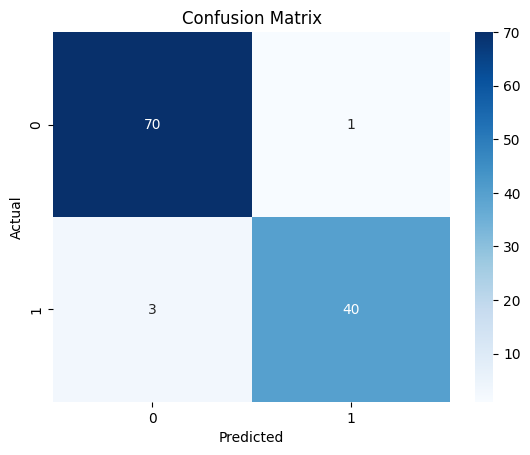

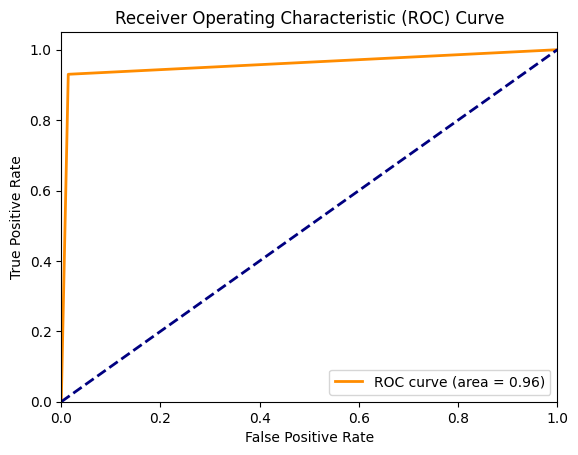

Stack 2: SVM+NB+DT -> RF | Accuracy: 0.9737 | F1 Score: 0.9735


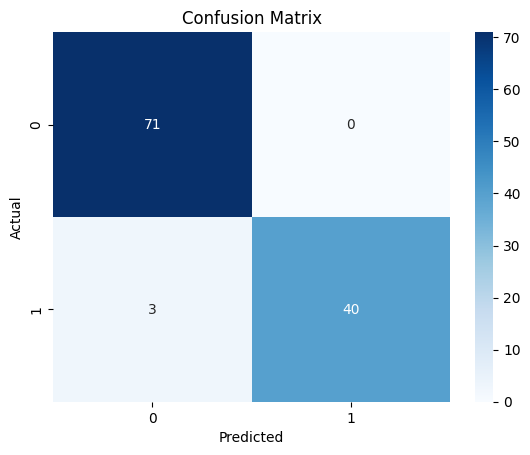

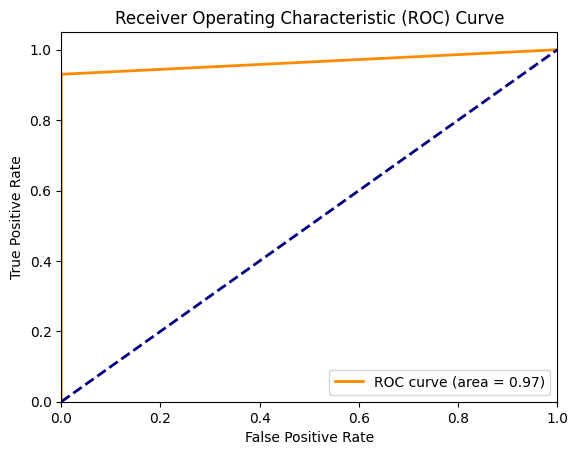

Stack 3: SVM+DT+KNN -> LR | Accuracy: 0.9737 | F1 Score: 0.9736


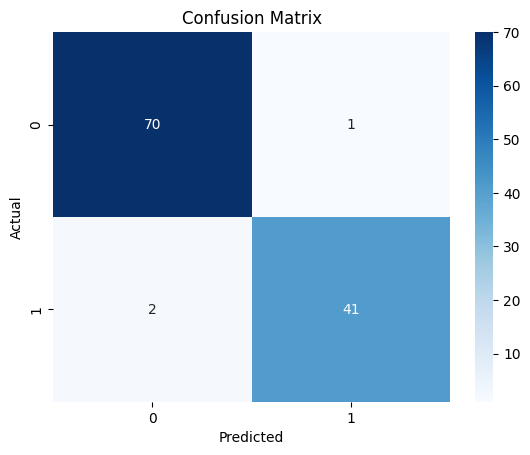

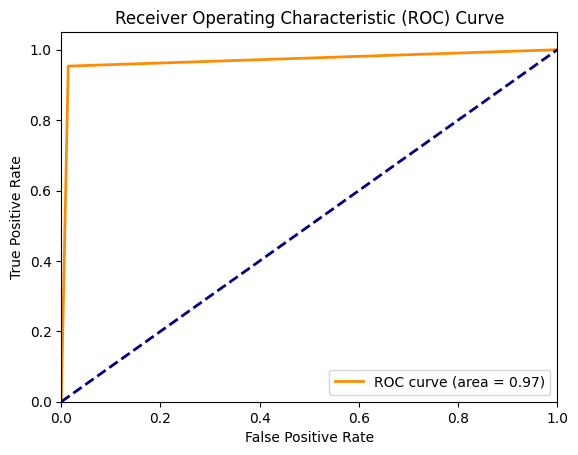

In [ ]:
#evaluating each stacking model
from sklearn.metrics import confusion_matrix
for name, model in [("Stack 1: SVM+NB+DT -> LR", stack1),
                    ("Stack 2: SVM+NB+DT -> RF", stack2),
                    ("Stack 3: SVM+DT+KNN -> LR", stack3)]:
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    print(f"{name} | Accuracy: {acc:.4f} | F1 Score: {f1:.4f}")
    #displaying confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    #displaying roc curve
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
#k-fold cross validation with each of the stacked models
from sklearn.model_selection import cross_val_score
for name, model in [("Stack 1: SVM+NB+DT -> LR", stack1),
                    ("Stack 2: SVM+NB+DT -> RF", stack2),
                    ("Stack 3: SVM+DT+KNN -> LR", stack3)]:
                    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy",n_jobs=-1)
                    print(f"{name} | Cross-validation scores:", cv_scores)
                    print("\n")



Stack 1: SVM+NB+DT -> LR | Cross-validation scores: [0.96703297 0.95604396 0.98901099 0.96703297 0.94505495]


Stack 2: SVM+NB+DT -> RF | Cross-validation scores: [0.97802198 0.96703297 0.98901099 0.97802198 0.94505495]


Stack 3: SVM+DT+KNN -> LR | Cross-validation scores: [0.97802198 0.96703297 0.98901099 0.97802198 0.95604396]


